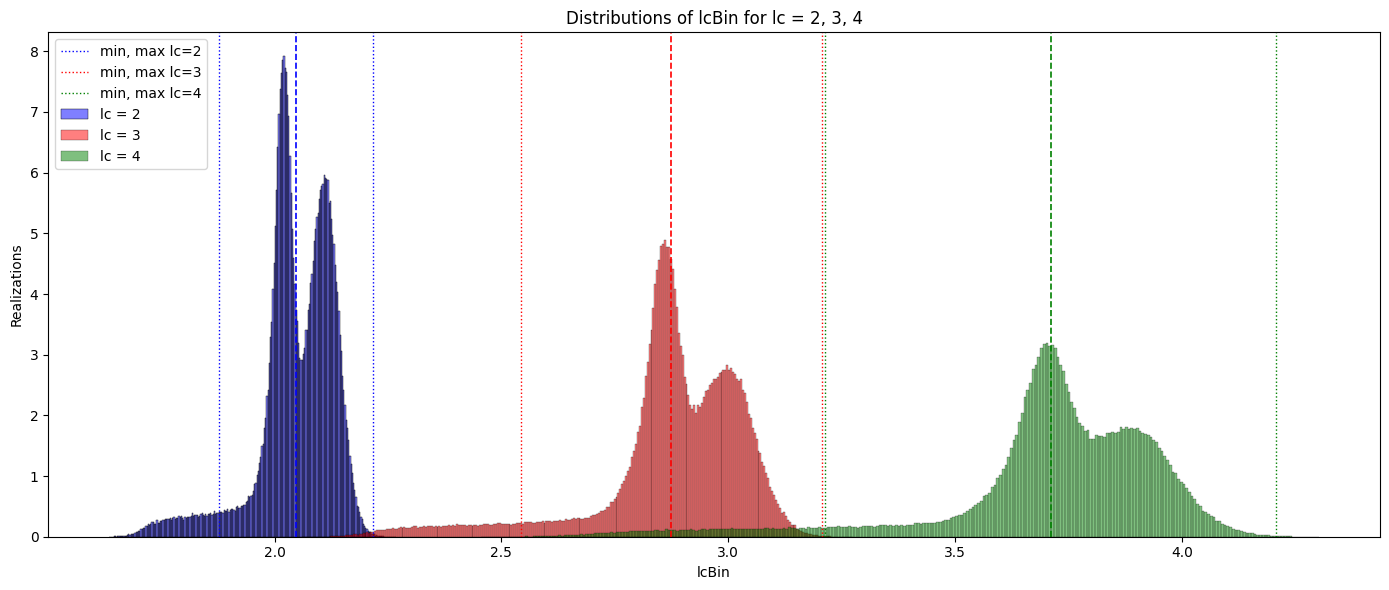

In [5]:
### Exploratory Data Analysis ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('ind_output_2D.csv')

def calculate_stats(data, lc_value, column='lcBin'):
    subset = data[data['lc'] == lc_value]
    mean = subset[column].mean()
    std = subset[column].std()
    minlim = mean - 2*std
    maxlim = mean + 2*std
    return subset, mean, std, minlim, maxlim

lc_values = [2, 3, 4]
stats = {}
for lc in lc_values:
    stats[lc] = calculate_stats(data, lc)

# Filter data by connectivity structure
data_ics = data[data['con'] == 1]
data_hcs = data[data['con'] == 2]
data_lcs = data[data['con'] == 3]


plt.figure(figsize=(14, 6))
colors = ['blue', 'red', 'green']
for i, lc in enumerate(lc_values):
    subset, mean, std, minlim, maxlim = stats[lc]
    sns.histplot(subset['lcBin'], bins='auto', kde=False, color=colors[i], alpha=0.5, label=f'lc = {lc}', stat='density')
    plt.axvline(x=mean, color=colors[i], linewidth=1.2, linestyle='--')  
    plt.axvline(x=minlim, color=colors[i], linewidth=1, linestyle=':', label=f'min, max lc={lc}')
    plt.axvline(x=maxlim, color=colors[i], linewidth=1, linestyle=':')

plt.legend()
plt.xlabel('lcBin')
plt.ylabel('Realizations')
plt.title('Distributions of lcBin for lc = 2, 3, 4')
plt.tight_layout()
plt.show()

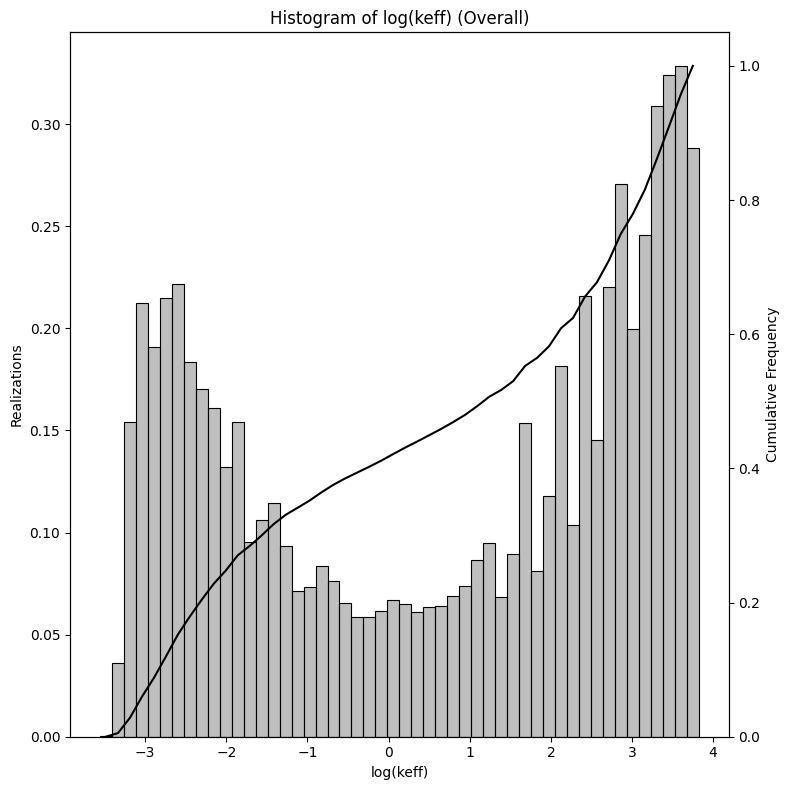

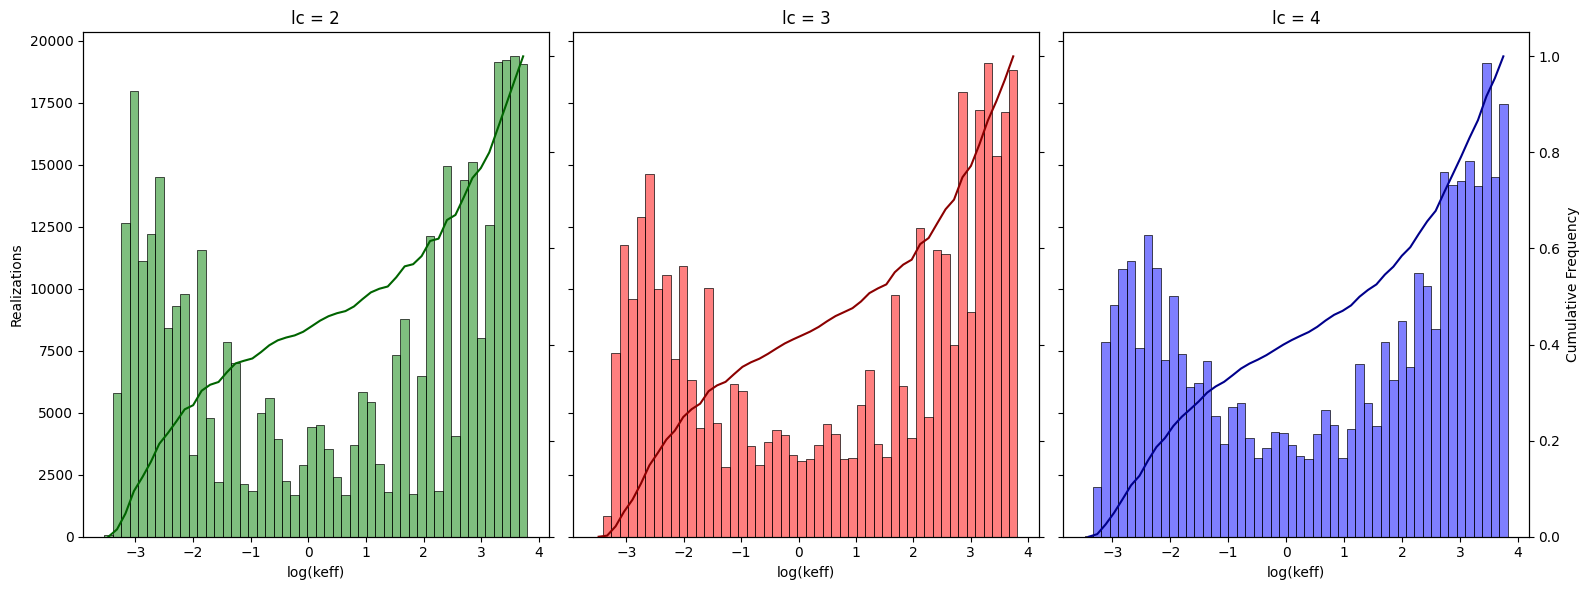

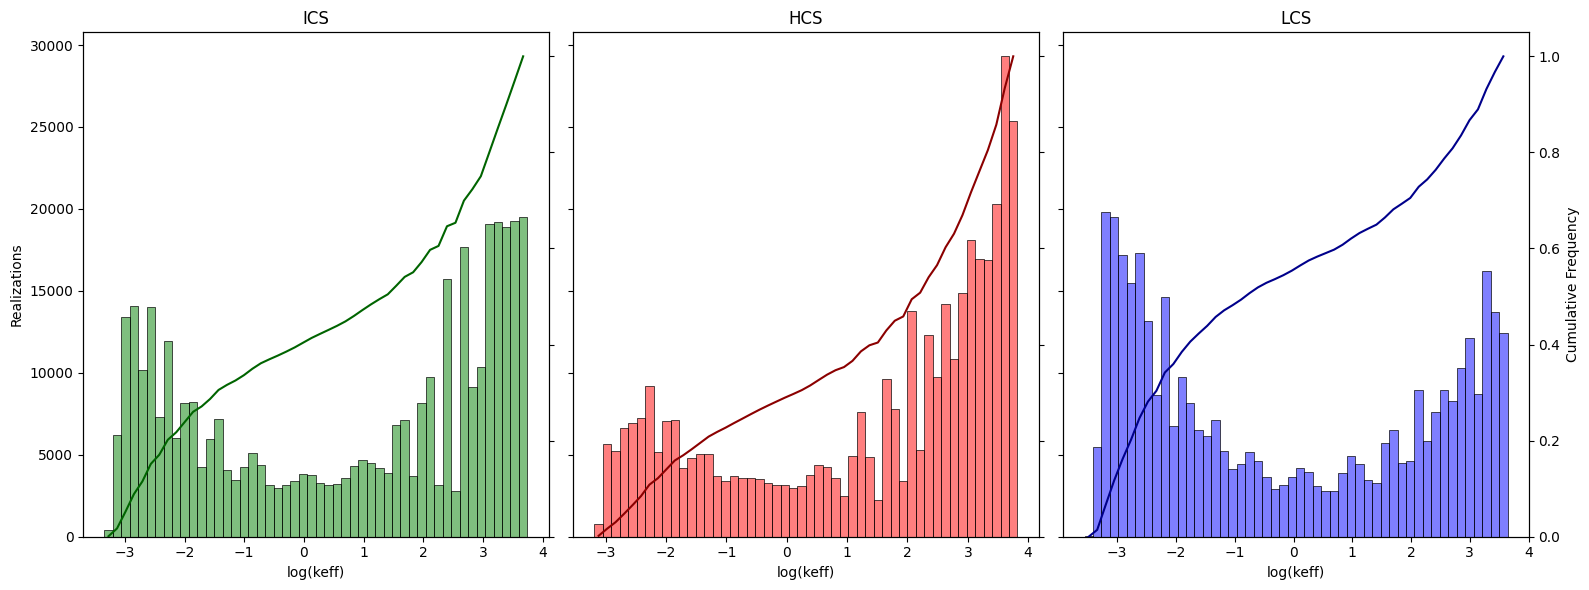

In [2]:
### Fixed Code for Histograms ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def histogram(data, bins, color_fill, color_line, title, ax):
    sns.histplot(np.log(data['keff']), bins=bins, kde=False,
                 color=color_fill, alpha=0.5, stat="count", fill=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('log(keff)')
    ax.set_ylabel('Realizations')
    ax_twin = ax.twinx()
    
    sns.histplot(np.log(data['keff']), bins=bins, kde=False,
                 color=color_line, stat="density", fill=False, cumulative=True,
                 linewidth=1.5, ax=ax_twin, element='poly')
    ax_twin.set_ylabel('Cumulative Frequency')

    if i in [0, 1]:
            ax_twin.set_ylabel('')
            ax_twin.set_yticklabels([])
            
    return ax, ax_twin

bins = 50
colors_fill = ['green', 'red', 'blue']
colors_line = ['darkgreen', 'darkred', 'darkblue']

data = pd.read_csv('ind_output_2D.csv')

lc_values = [2, 3, 4]
filtered_data_lc = {lc: data[data['lc'] == lc] for lc in lc_values}

data_ics = data[data['con'] == 1]
data_hcs = data[data['con'] == 2]
data_lcs = data[data['con'] == 3]

plt.figure(figsize=(8, 8))

ax_main = sns.histplot(np.log(data['keff']), bins=bins, kde=False,
                       color='grey', alpha=0.5, stat="density", fill=True, label='Keff')
plt.ylabel('Realizations')
plt.xlabel('log(keff)')
plt.title('Histogram of log(keff) (Overall)')
ax_main_twin = ax_main.twinx()
sns.histplot(np.log(data['keff']), bins=bins, kde=False,
             color='black', stat="density", fill=False, cumulative=True,
             linewidth=1.5, ax=ax_main_twin, label='Cumulative Keff', element='poly')
ax_main_twin.set_ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
titles = ['lc = 2', 'lc = 3', 'lc = 4']
for i, lc in enumerate(lc_values):
    dataset = filtered_data_lc[lc]
    histogram(dataset, bins, colors_fill[i], colors_line[i], titles[i], axs[i])
    
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
datasets = [data_ics, data_hcs, data_lcs]
titles = ['ICS', 'HCS', 'LCS']
for i, (dataset, title) in enumerate(zip(datasets, titles)):
    histogram(dataset, bins, colors_fill[i], colors_line[i], title, axs[i])
plt.tight_layout()
plt.show()


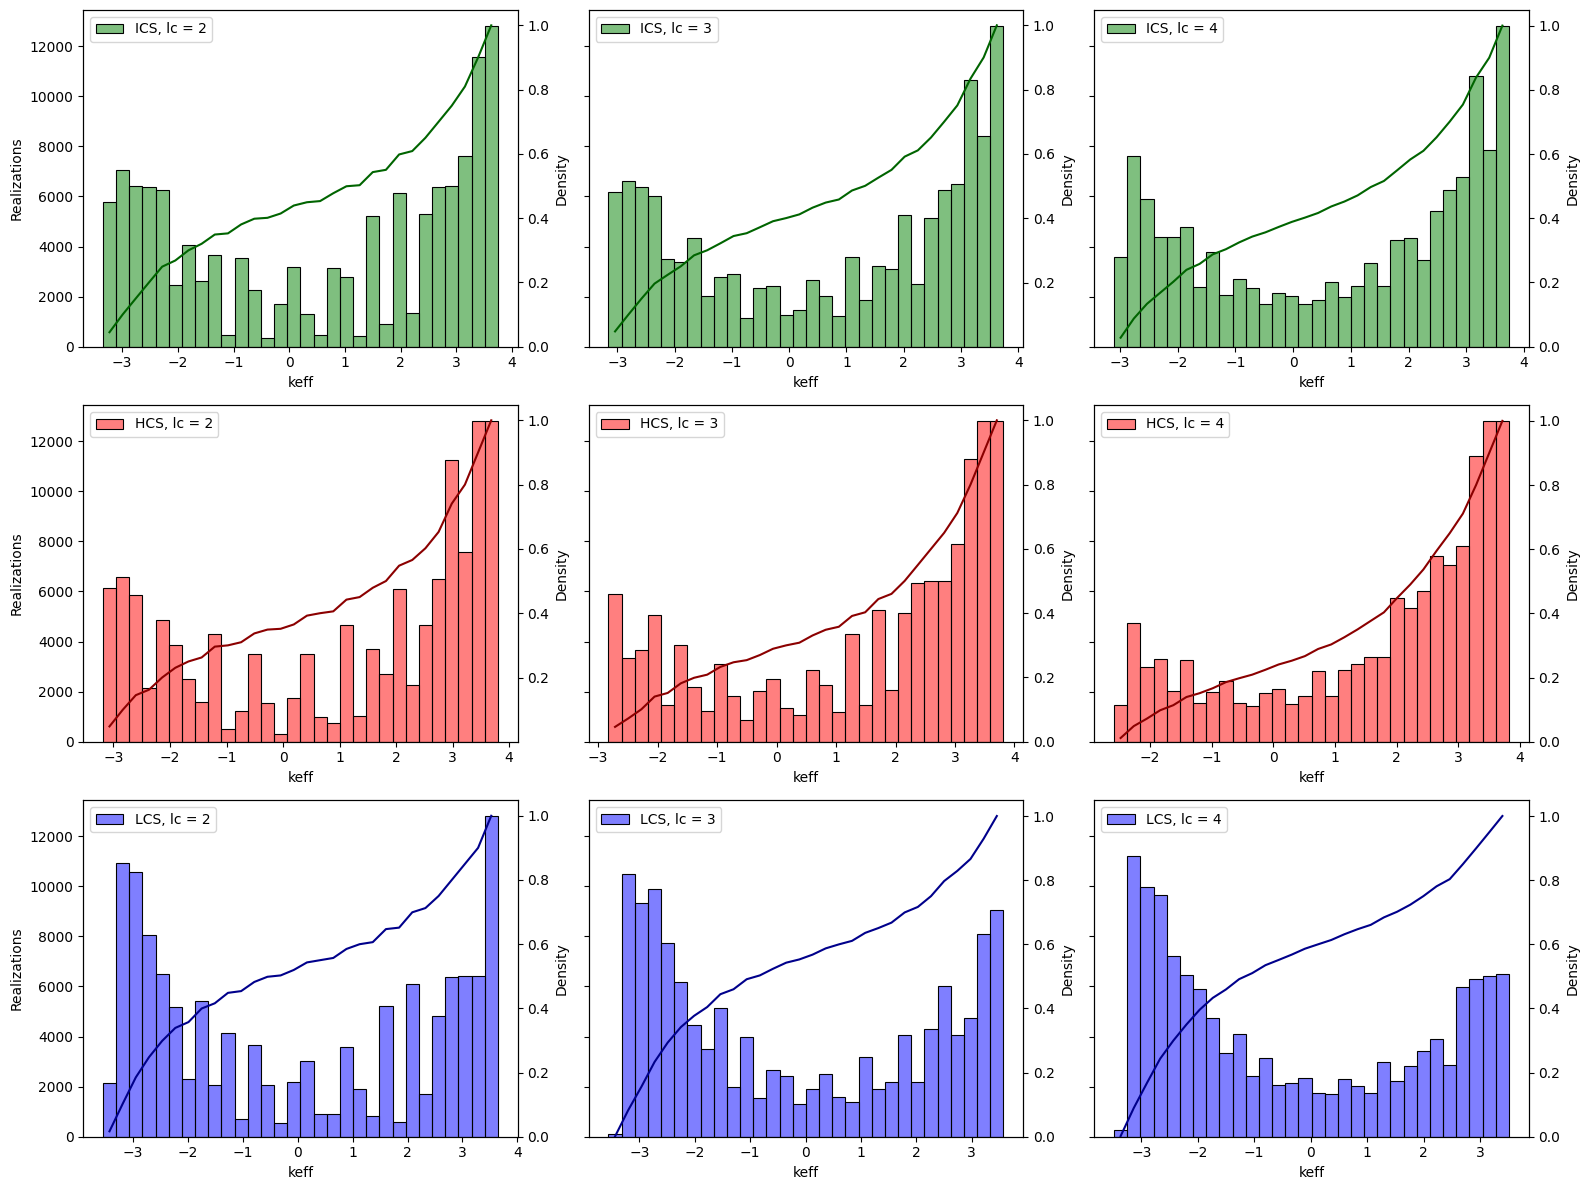

In [15]:
def filter_data(data, con_value, lc_value):
    return data[(data.con == con_value) & (data.lc == lc_value)]

dataICSlc2 = filter_data(data, con_value=1, lc_value=2)
dataICSlc3 = filter_data(data, con_value=1, lc_value=3)
dataICSlc4 = filter_data(data, con_value=1, lc_value=4)

dataHCSlc2 = filter_data(data, con_value=2, lc_value=2)
dataHCSlc3 = filter_data(data, con_value=2, lc_value=3)
dataHCSlc4 = filter_data(data, con_value=2, lc_value=4)

dataLCSlc2 = filter_data(data, con_value=3, lc_value=2)
dataLCSlc3 = filter_data(data, con_value=3, lc_value=3)
dataLCSlc4 = filter_data(data, con_value=3, lc_value=4)

data_ec_lc = [[dataICSlc2['keff'], dataICSlc3['keff'], dataICSlc4['keff']],
              [dataHCSlc2['keff'], dataHCSlc3['keff'], dataHCSlc4['keff']],
              [dataLCSlc2['keff'], dataLCSlc3['keff'], dataLCSlc4['keff']]]

ec = ['ICS', 'HCS', 'LCS']
lc = ['2', '3', '4']

col = ['green', 'red', 'blue']
col2 = ['darkgreen', 'darkred', 'darkblue']
newBins = 30

fig, axs = plt.subplots(3, 3, figsize=(16, 12), sharey=True)

for ic in range(3):
    for ilc in range(3):   
        axh = sns.histplot(np.log(data_ec_lc[ic][ilc]), 
                           bins=newBins, kde=False, 
                           color=col[ic], fill=True, alpha=0.5, ax=axs[ic][ilc],
                           label=f"{ec[ic]}, lc = {lc[ilc]}")
        axs[ic][ilc].set_ylabel('Realizations')
        axs[ic][ilc].legend(loc='upper left')
        
        axf = axs[ic][ilc].twinx()
        sns.histplot(np.log(data_ec_lc[ic][ilc]), 
                     bins=newBins, kde=False, 
                     color=col2[ic], stat="density", fill=False, cumulative=True, 
                     common_norm=False, element='poly', linewidth=1.5, ax=axf, 
                     label='Cumulative Keff')

plt.tight_layout()
plt.show()

22 ['PPHA' 'VOLALE' 'ZNCC' 'GAMMA' 'spanning' 'npz' 'npy' 'npx' 'Plen' 'S'
 'P' 'PlenX' 'SX' 'PX' 'L' 'con' 'lc' 'p' 'lcG' 'lcNst' 'lcBin' 'keff']
10 ['PPHA' 'VOLALE' 'ZNCC' 'GAMMA' 'spanning' 'Plen' 'S' 'P' 'PlenX' 'lcBin']


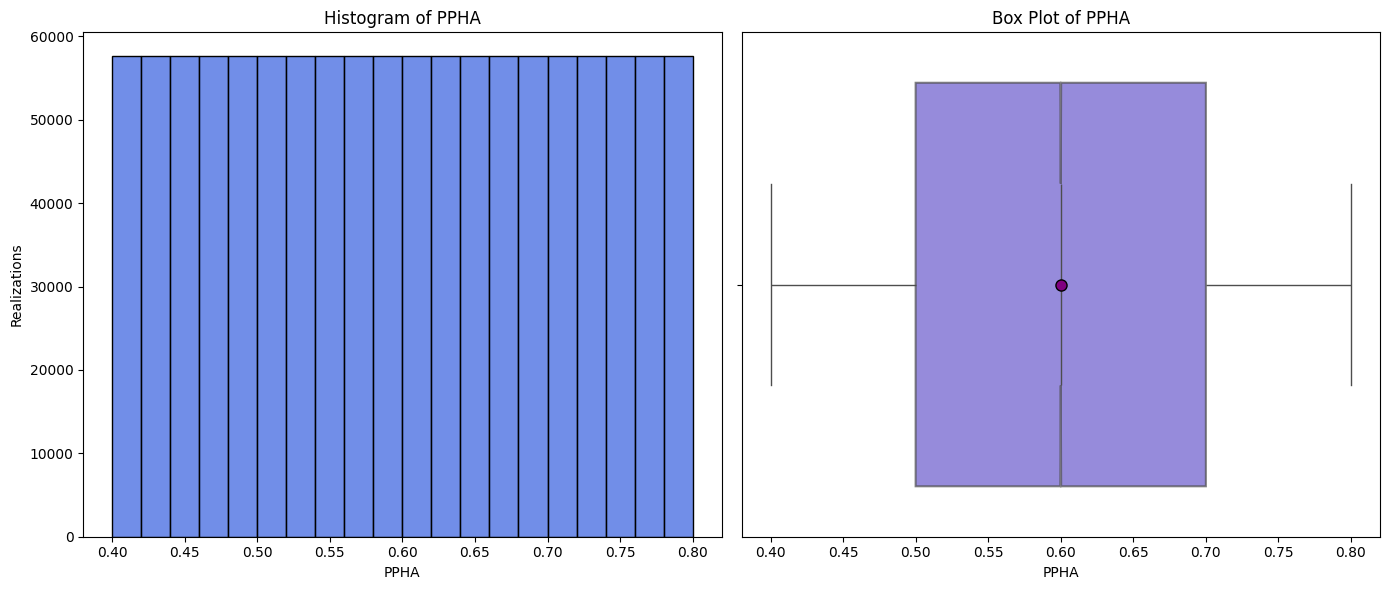

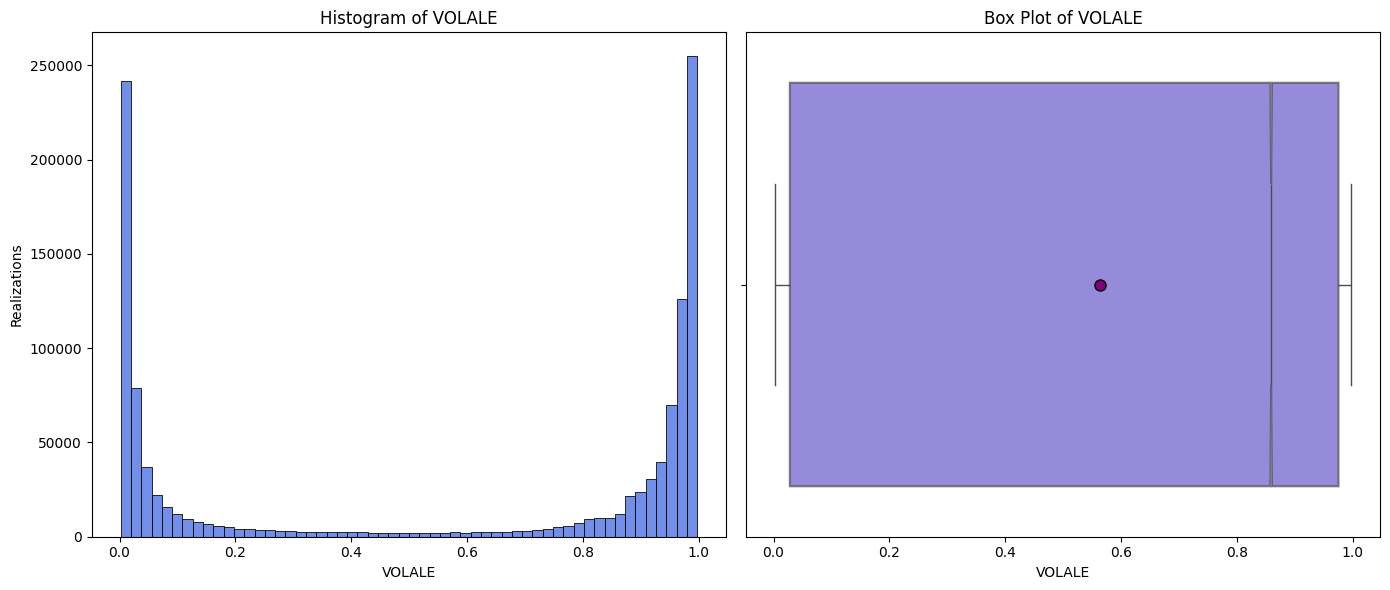

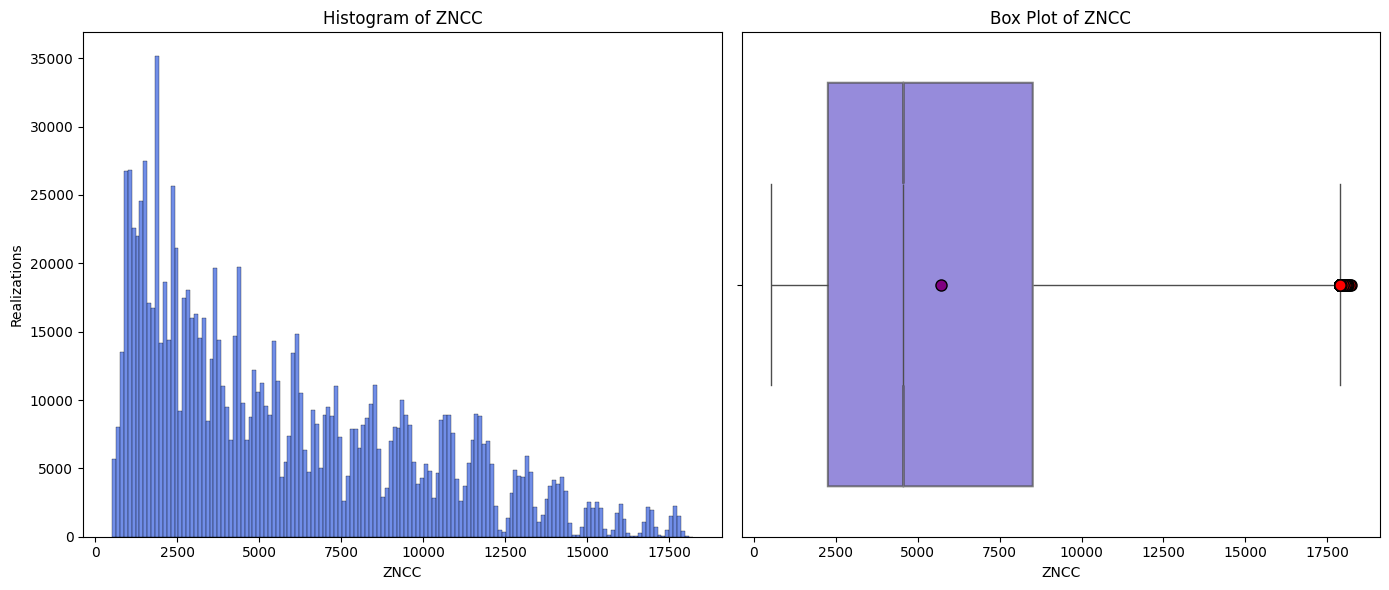

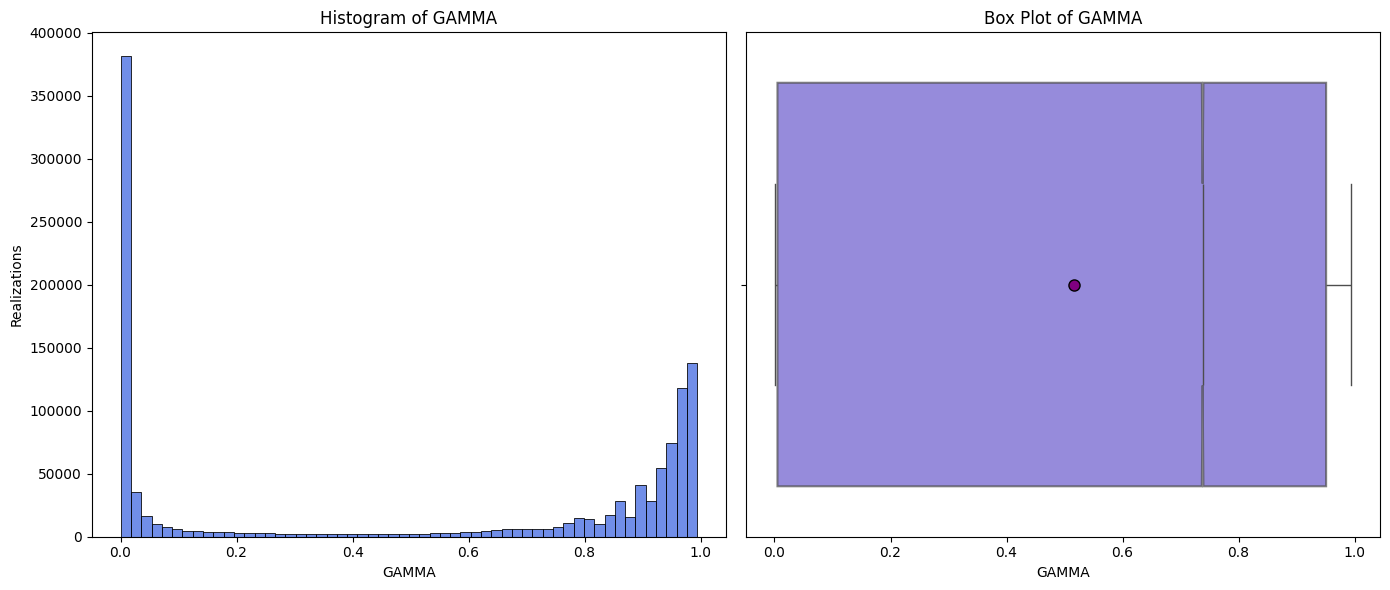

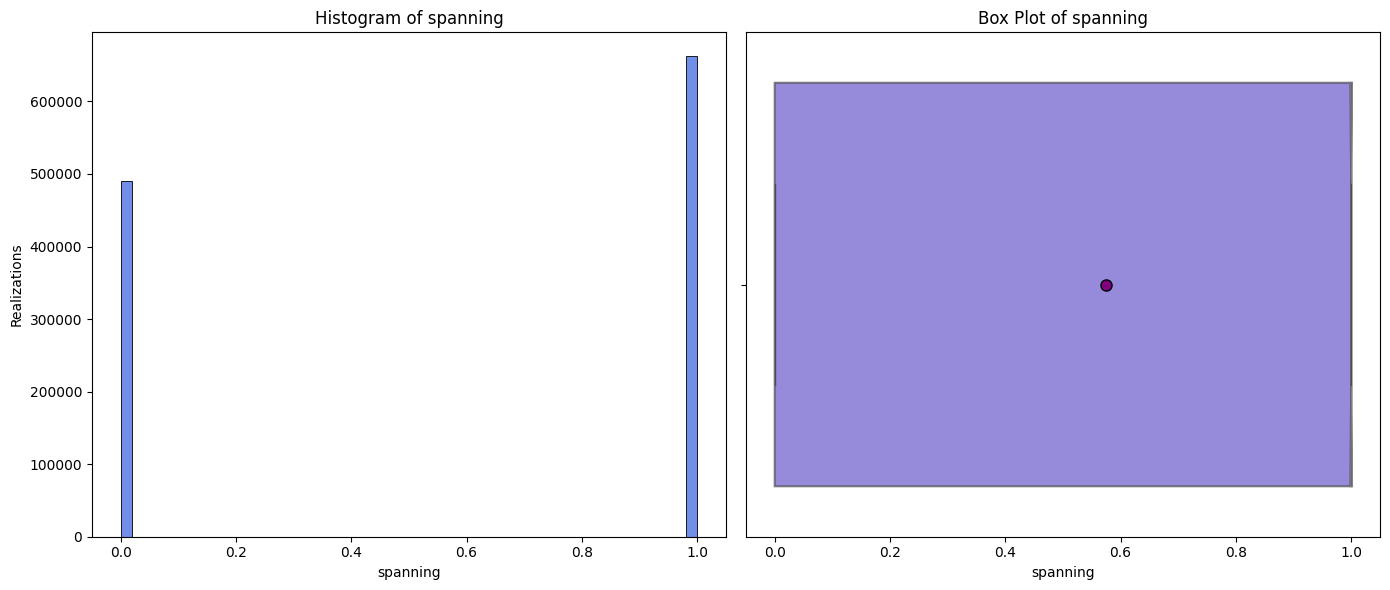

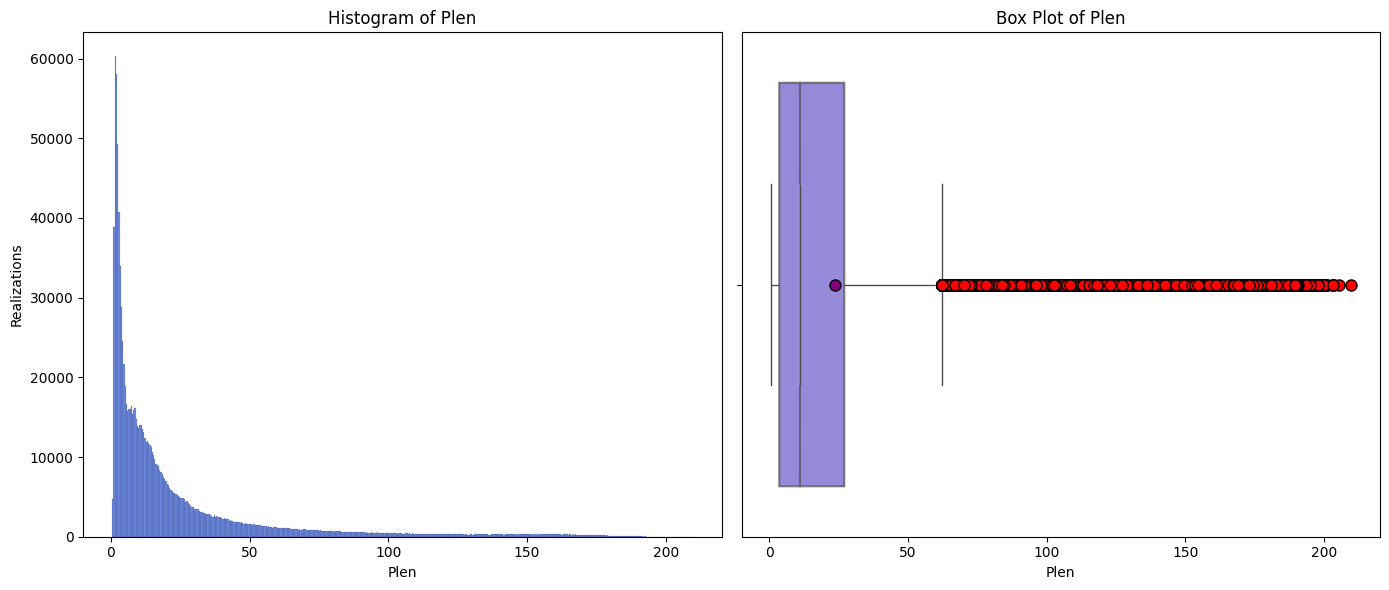

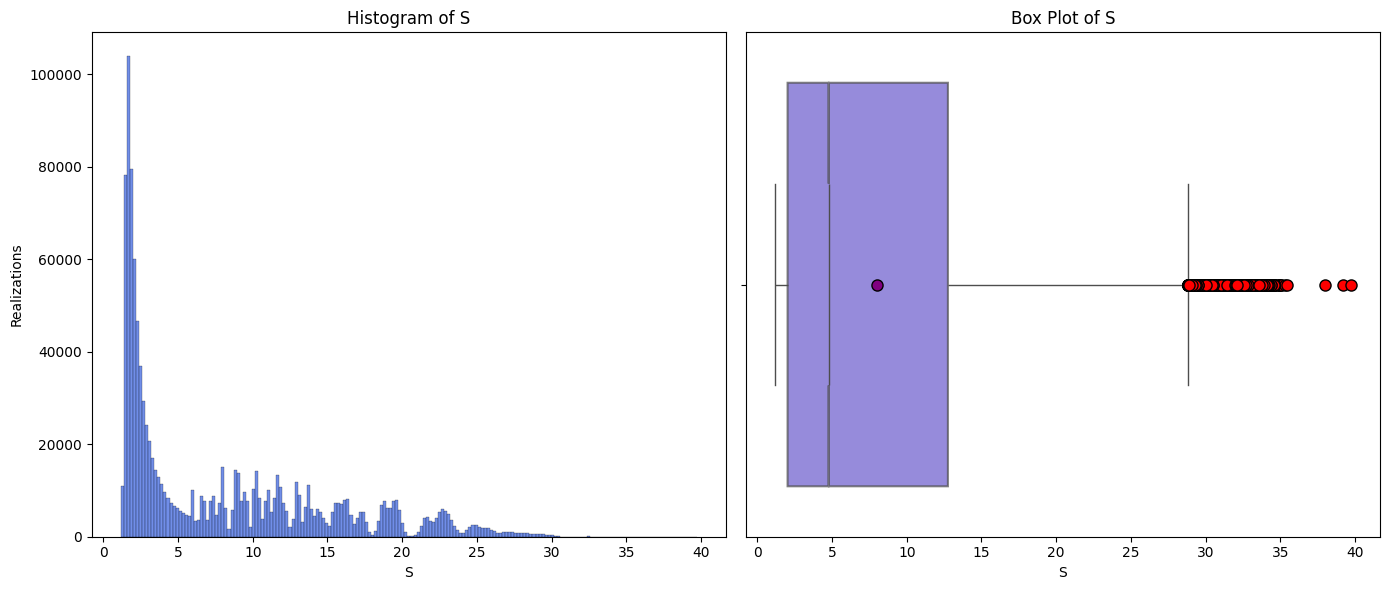

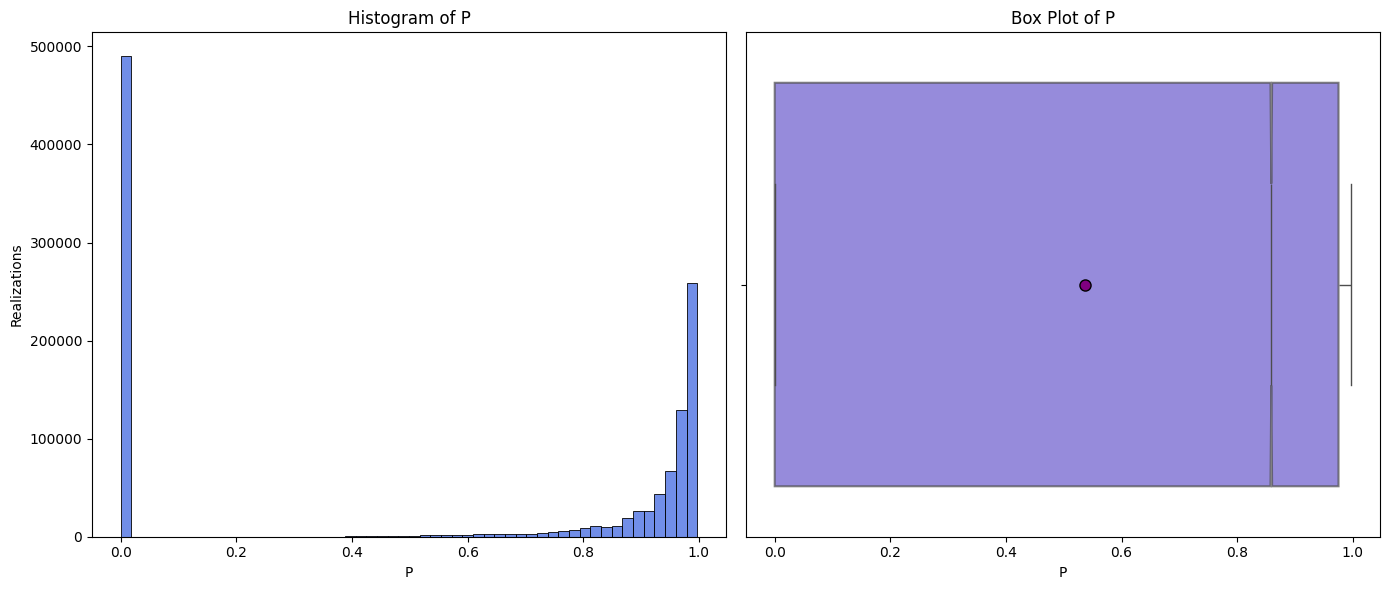

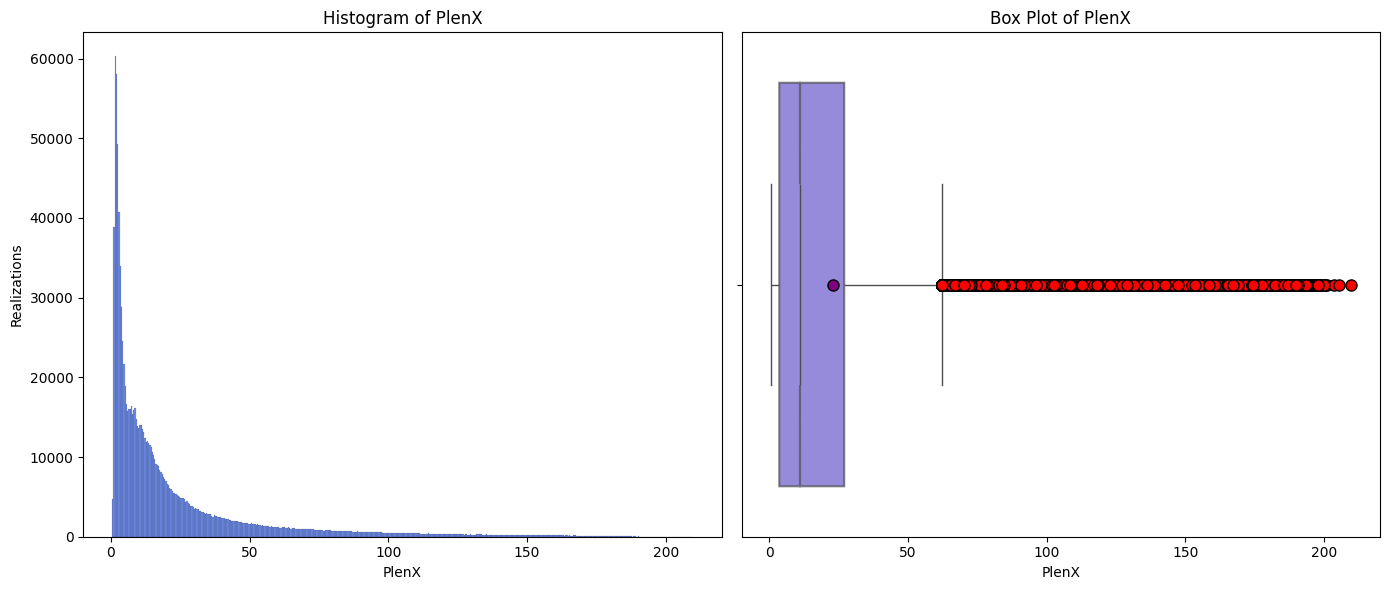

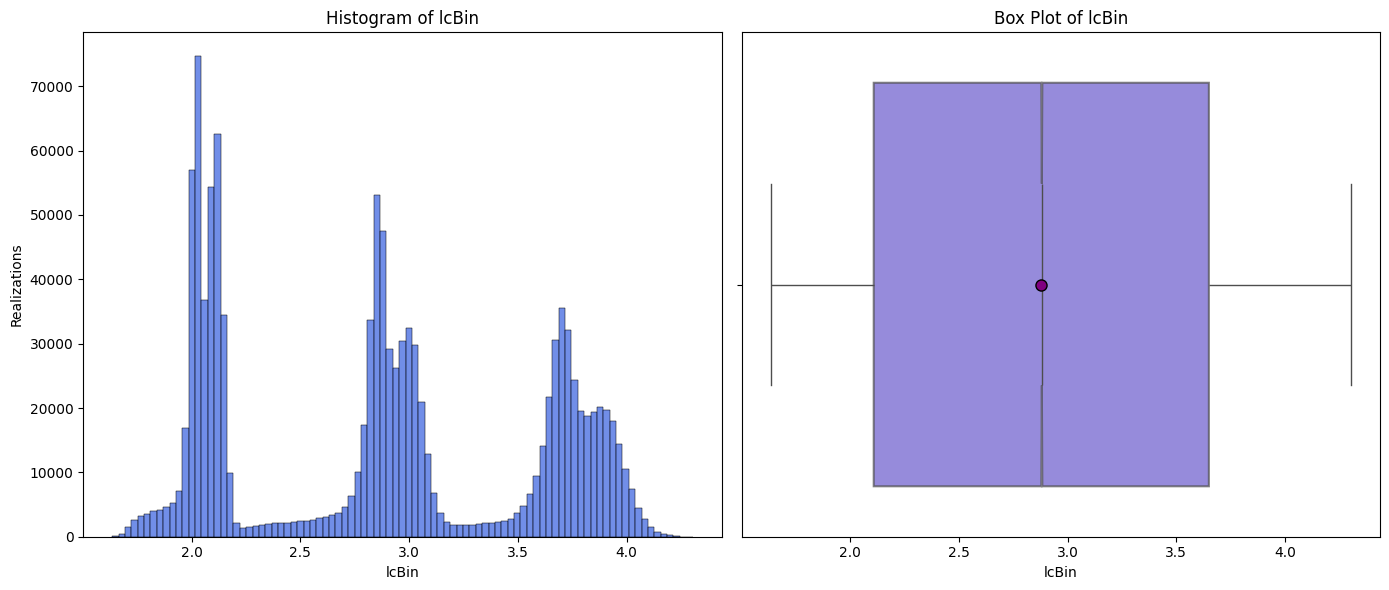

In [45]:
### Histograms and box plots of indicators ###
header = data.columns.to_numpy()
print(len(header), header)
delete = [5, 6, 7, 12, 13, 14, 15, 16, 17, 18, 19, 21]
data_ind = np.delete(header, delete)
print(len(data_ind), data_ind)

for ind in range(len(data_ind)):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    if data_ind[ind] == 'PPHA':
        bins = 20
    else:
        bins = 'auto'

    sns.histplot(data[data_ind[ind]], 
                    bins=bins, kde=False, 
                    color='royalblue', stat="count", 
                    fill=True, 
                    label=data_ind[ind],
                    alpha=0.75, ax=axs[0])
    axs[0].set_ylabel('Realizations')
    axs[0].set_xlabel(data_ind[ind])
    axs[0].set_title(f'Histogram of {data_ind[ind]}')

    sns.boxplot(x=data[data_ind[ind]], color='cyan', ax=axs[1], notch=True, showmeans=True,
                meanprops={'marker':'o', 'markerfacecolor':'purple', 'markeredgecolor':'black', 'markersize':8},
                flierprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'black', 'markersize':8},
                boxprops={'facecolor':'slateblue', 'linewidth':1.5, 'alpha':0.7})
    axs[1].set_xlabel(data_ind[ind])
    axs[1].set_title(f'Box Plot of {data_ind[ind]}')

    plt.tight_layout()
    plt.show()